# **CAPSTONE 3 - Telco Customer Churn Analysis**

---

## *Az Zahra Syahida - JCDS 2204*

## **1. Data Understanding**

---


### Background:

Analyzing customer churn data is essential to provide in-depth insights into the dynamics of Telco customers. Churn, referring to customers who decide to terminate their relationship with the service provider, reflects a critical decision that can impact the company's growth. By better understanding the factors contributing to customers' decisions to leave, companies can take strategic steps to optimize services and strengthen their position in an increasingly competitive market.

---


### Problem Statement:

In this context, the problem lies in gaining detailed understanding of what drives customers to churn. The central question driving this analysis is, *"What are the key determinants of customer churn?"*. Factors such as tenure, contract type, and the type of internet service used may have significant impacts. The ultimate goal is to empower telco firms to reduce retention costs by strategically lowering the churn rate and fostering long-term customer relationships.

---


### Importance and Potential Solutions:

By addressing the challenges of customer churn, Telco can build a foundation for optimizing customer retention strategies. This includes improving services and adjusting contract models that can retain customers. By focusing the analysis on key aspects of churn data, companies can formulate effective solutions to enhance customer satisfaction, increase loyalty, and overall improve business performance.

---



### Explanation of Dataset Features

| Features            | Description                                               |
|----------------------|-----------------------------------------------------------|
| Dependents           | Whether the customer has dependents or not.               |
| Tenure               | Number of months the customer has stayed with the company.|
| OnlineSecurity       | Whether the customer has online security or not.           |
| OnlineBackup         | Whether the customer has online backup or not.             |
| InternetService      | Whether the client is subscribed to Internet service.      |
| DeviceProtection     | Whether the client has device protection or not.           |
| TechSupport          | Whether the client has tech support or not.                |
| Contract             | Type of contract according to duration.                    |
| PaperlessBilling     | Bills issued in paperless form.                            |
| MonthlyCharges       | Amount of charge for service on a monthly basis.           |
| Churn                | Whether the customer churns or not.                        |

## **2. Define Predictive Analysis Case**

---


|                   | Predicted Churn (Positive) | Predicted Not Churn (Negative) |
|-------------------|-----------------------------|---------------------------------|
| Actual Churn (Positive)      | True Positives (TP)        | False Negatives (FN)           |
| Actual Not Churn (Negative)  | False Positives (FP)       | True Negatives (TN)            |


### Target Definition:

In this case, the target is to predict whether a customer will churn or not. `Churn` is represented as `1 (positive)` for customers who cease using the service, while `Not churn` is represented as `0 (negative)` for customers who continue using the service.

---


### Errors in the Context of Customer Churn:

Type I errors (FP) and Type II errors (FN) have different implications in the context of customer churn. FP could result in a waste of resources in efforts to retain satisfied customers, while FN could lead to missed opportunities to retain customers who are dissatisfied.

---


### Importance of Type II Errors (FN):

In many business contexts, FN is often considered more serious because retaining existing customers is usually less costly than acquiring new ones. Therefore, reducing the number of FN (correctly identifying potential churn customers) is often considered more important.

---


### Define an Evaluation Metric:

In churn prediction, the choice of evaluation metric becomes crucial as it aligns with the business objectives. Recall stands out as the primary choice, emphasizing the model's capability to capture all positive cases (churn) with minimal errors. Metrics such as Precision or F1 Score, while having their advantages, are not as effective as Recall in avoiding errors that might overlook potential churners. In this context, the selection of `Recall as the evaluation metric` prioritizes reducing False Negatives (FN), making it more efficient in identifying customers about to leave the service and addressing the core business goal of retaining the customer base.

## **3. Data Cleaning and Data Checking**

---


### Import Libraries

In [1]:

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import shapiro

from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, cross_validate,StratifiedKFold,GridSearchCV
from sklearn.metrics import make_scorer, recall_score, accuracy_score, confusion_matrix,ConfusionMatrixDisplay


import warnings 
warnings.filterwarnings('ignore')

### Load Dataset

In [2]:
data = pd.read_csv('data_telco_customer_churn.csv')
print(data.shape)
data.head()


(4930, 11)


,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


The dataset has 4930 rows and 11 columns

### Data Checking

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


In [4]:
data.isnull().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

> The data types are correctly formatted and there are no null values present.

In [5]:
data.describe()

,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


>  This summary provides a quick overview of the distribution and central tendencies of the numerical data in the DataFrame.

### Unique Values Checking 

In [6]:
pd.DataFrame({
    'feature' : data.columns.values,
    'data_type' : data.dtypes.values,
    'null_values' : data.isna().mean().values*100,
    'n_unique' : data.nunique().values,
    'sample_unique':[data[col].unique() for col in data.columns]
})


,feature,data_type,null_values,n_unique,sample_unique
0,Dependents,object,0.0,2,"[Yes, No]"
1,tenure,int64,0.0,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1..."
2,OnlineSecurity,object,0.0,3,"[No, Yes, No internet service]"
3,OnlineBackup,object,0.0,3,"[No, Yes, No internet service]"
4,InternetService,object,0.0,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,object,0.0,3,"[Yes, No internet service, No]"
6,TechSupport,object,0.0,3,"[Yes, No, No internet service]"
7,Contract,object,0.0,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,object,0.0,2,"[Yes, No]"
9,MonthlyCharges,float64,0.0,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7,..."


- The dataset contains 4930 rows with no missing values. However, there are 77 rows with duplicate data.

- `Categorical Features` : Dependents, OnlineSecurity, OnlineBackup, InternetService, DeviceProtection, TechSupport, Contract, PaperlessBilling& Churn.

- `Numerical Features` : tenure, MonthlyCharges


In the dataset, for categorical columns namely *'OnlineSecurity', 'OnlineBackup,', 'DeviceProtection', and 'TechSupport'* contain unique values including `Yes and No`, with `No phone service` and `No internet service`.

In [7]:
columns_to_update = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']


for column in columns_to_update:
    unique_values = data[column].unique()
    print(f"Unique values in {column}: {unique_values}")


Unique values in OnlineSecurity: ['No' 'Yes' 'No internet service']
Unique values in OnlineBackup: ['No' 'Yes' 'No internet service']
Unique values in DeviceProtection: ['Yes' 'No internet service' 'No']
Unique values in TechSupport: ['Yes' 'No' 'No internet service']


Given the presence of values like *'No phone service'* and *'No internet service'* a decision has been made to standardize and simplify these entries.

I thought it would be cleaner to make things simple. So, I decided to replace those special cases with something more straightforward.... I went with *'No'*

---

**Updated Unique Values:**

In [8]:

for column in columns_to_update:
    data[column] = data[column].replace('No internet service', 'No')

    unique_values = data[column].unique()
    print(f"Unique values in {column}: {unique_values}")


Unique values in OnlineSecurity: ['No' 'Yes']
Unique values in OnlineBackup: ['No' 'Yes']
Unique values in DeviceProtection: ['Yes' 'No']
Unique values in TechSupport: ['Yes' 'No']


> Just felt like it makes the data easier to understand. No more confusion!

### Handling Duplicate Data

In [9]:
data[data.duplicated()]

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
624,No,1,No,No,No,No,No,Month-to-month,No,19.65,No
701,No,41,No,No,No,No,No,Two year,No,20.65,No
786,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.65,Yes
951,No,1,No,No,No,No,No,Month-to-month,No,20.15,Yes
1266,No,1,No,No,No,No,No,Month-to-month,No,19.65,No
...,...,...,...,...,...,...,...,...,...,...,...
4759,No,4,No,No,No,No,No,Month-to-month,No,20.05,No
4786,No,1,No,No,No,No,No,Month-to-month,No,20.35,No
4788,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,70.10,Yes
4866,No,1,No,No,DSL,No,No,Month-to-month,Yes,55.00,Yes


In [10]:
data.duplicated().sum() / len(data)

0.01561866125760649

In [11]:
data.drop_duplicates(inplace=True)

- The percentage of duplicated data in the overall dataset is very low, specifically at **0.02%**.

- Since this dataset lacks a unique ID feature, distinguishing whether the duplicated data is genuinely repetitive or coincidental is not possible. As a result, dropping these duplicates won't impact the percentage of the 'target' feature. Therefore, the decision is made to drop these duplicated records.

### Outliers Checking

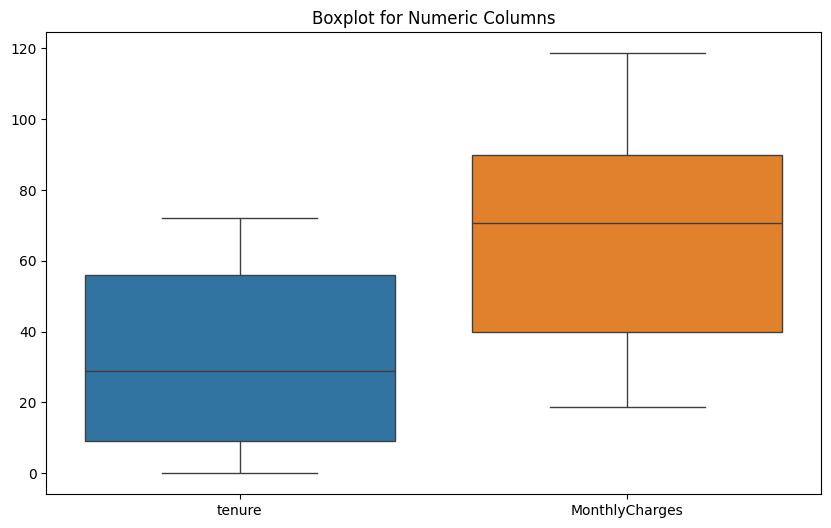

In [12]:
numCols = data[['tenure', 'MonthlyCharges']]

plt.figure(figsize=(10, 6))
sns.boxplot(data=numCols)
plt.title('Boxplot for Numeric Columns')
plt.show()

This data is deemed highly clean, and the absence of outliers contributes to the overall quality and reliability of the dataset for subsequent analyses.

### Checking Data Imbalance

In [13]:
# Percentage of Target Columns
churn_percentage = 100 * data['Churn'].value_counts() / len(data['Churn'])

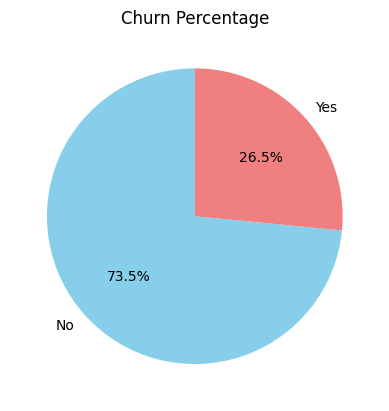

In [14]:
# Pie chart plot
plt.pie(churn_percentage, labels=churn_percentage.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Churn Percentage')
plt.show()

The dataset displays an imbalance, with a majority of instances labeled as 'No' in comparison to 'Yes.' Addressing class imbalance is crucial for machine learning models, as it can impact the model's ability to accurately predict minority classes.

### Change the values in the 'churn' column

In [15]:
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

- `df['churn']`: This accesses the 'churn' column in the DataFrame.
- `.map({'Yes': 1, 'No': 0})`: This maps the values in the 'churn' column using the provided dictionary. It replaces 'Yes' with 1 and 'No' with 0.

So, after executing this code, the 'churn' column will be transformed, and 'Yes' and 'No' will be replaced with 1 and 0, respectively.


### Normality Test for the 'MonthlyCharges' Column

In [16]:
stat, p_value = shapiro(data['MonthlyCharges'])

print(f"Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}")

Shapiro-Wilk Test Statistic: 0.9245319962501526, p-value: 4.344025239406933e-44


In [17]:
if p_value > 0.05:
    print("The 'MonthlyCharges' data follows a normal distribution.")
else:
    print("The 'MonthlyCharges' data does not follow a normal distribution.")


The 'MonthlyCharges' data does not follow a normal distribution.


With a `p-value` significantly `below 0.05`, we reject the null hypothesis that the 'MonthlyCharges' data follows a normal distribution. This provides substantial evidence to conclude that the distribution of 'MonthlyCharges' doesn't adhere to a normal distribution.

In the context of my scaling plan, when dealing with non-normally distributed data, opting for a scaling method independent of normality assumptions is advisable. Robust Scaler serves as a robust choice, being resistant to outliers and not relying on the assumption of normal distribution. Therefore, in this scenario, it would be prudent to employ the `Robust Scaler for scaling the 'MonthlyCharges'`.


## **4. Exploratory Data Analysis**

---


### Handling Zero Months of Customer Tenure in Churn Analysis

- In the churn analysis, one of the key features is "tenure," representing the number of months a customer has stayed with the company.

- However, there is a subset of the data that contains instances where the tenure is recorded as zero months.

- Given that the objective of the analysis is to examine churn and non-churn scenarios, instances with zero months of tenure may not contribute significantly to this analysis.

- The decision to remove instances with zero months of tenure is driven by the assumption that customers with zero months of tenure may not have engaged in a substantial relationship with the company, and their inclusion may not provide meaningful insights into churn behavior.

- The removal of these instances allows for a more focused analysis on customers who have established a relationship with the company for a certain duration.

In [18]:
data[data['tenure'] == 0].index

Index([82, 325, 1053, 2017, 2902, 3410, 4192, 4441], dtype='int64')

In [19]:
data.drop(labels=data[data['tenure'] == 0].index, axis=0, inplace=True)

In [20]:
data[data['tenure'] == 0].index

Index([], dtype='int64')

### Potential Churn Indicators

Categorizing tenure into distinct groups to examine which category preferred by customers may significantly influence their decision to churn.

In [21]:
# Define the tenure categories based on grouping every 12 values
group_size = 12
data['tenure_segment'] = (data['tenure'] - 1) // group_size + 1

# Display the counts in each category
data['tenure_segment'].value_counts()


tenure_segment
1    1459
6     963
2     721
5     597
3     578
4     527
Name: count, dtype: int64

In [22]:
# Devide the Churn and count them
noChurn = data[data['Churn'] == 0]['tenure_segment'].value_counts().sort_index()
yesChurn = data[data['Churn'] == 1]['tenure_segment'].value_counts().sort_index()

# Calculate total counts for each group
total_noChurn = noChurn.sum()
total_yesChurn = yesChurn.sum()

# Calculate percentages for each group
noChurn_percentage = (noChurn / total_noChurn) * 100
yesChurn_percentage = (yesChurn / total_yesChurn) * 100


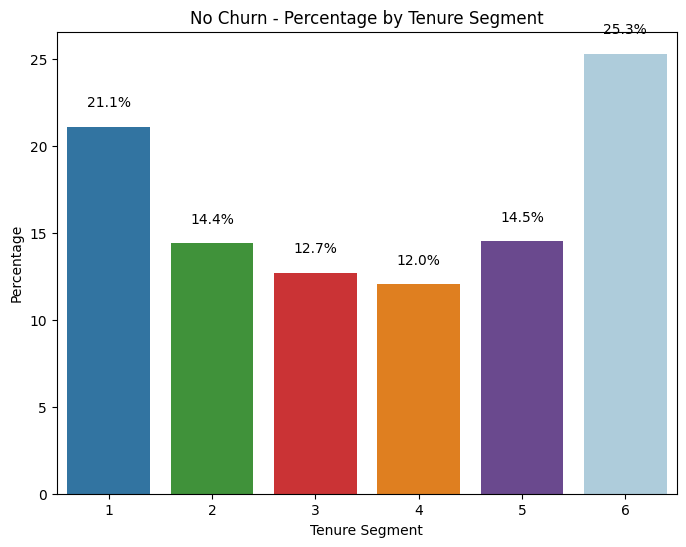

In [23]:
# Choose a colorblind-friendly color palette
color_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a", "#a6cee3"]

# Create bar chart for No Churn in percentage
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x=noChurn_percentage.index,
    y=noChurn_percentage,
    palette=color_palette
)
plt.title('No Churn - Percentage by Tenure Segment')
plt.ylabel('Percentage')
plt.xlabel('Tenure Segment')

# Add percentage values on top of the bars
for i, val in enumerate(noChurn_percentage):
    ax.text(i, val + 1, f'{val:.1f}%', ha='center', va='bottom')

plt.show()


> Overall, there is a downward trend in the No Churn percentage with an increase in the Tenure Segment, creating a decreasing pattern from segment 1 to segment 6. Despite the decline, `segment 6` still has the `highest No Churn percentage at 25.30%`.


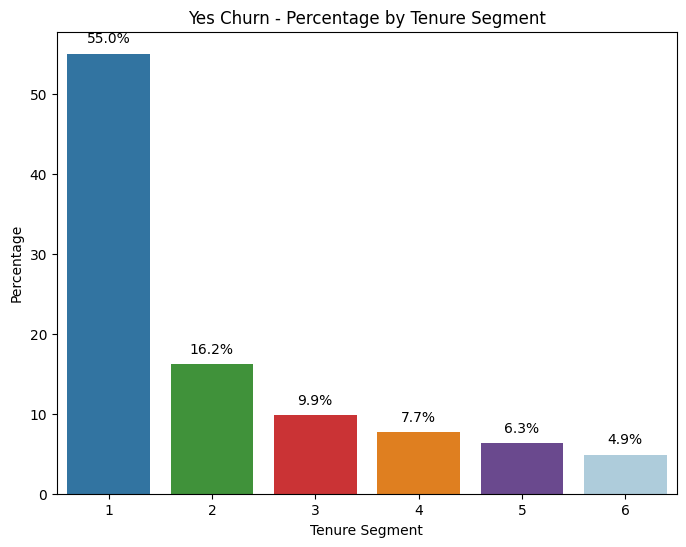

In [24]:
# Create bar chart for Yes Churn in percentage
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x=yesChurn_percentage.index,
    y=yesChurn_percentage,
    palette=color_palette
)
plt.title('Yes Churn - Percentage by Tenure Segment')
plt.ylabel('Percentage')
plt.xlabel('Tenure Segment')

# Add percentage values on top of the bars
for i, val in enumerate(yesChurn_percentage):
    ax.text(i, val + 1, f'{val:.1f}%', ha='center', va='bottom')

plt.show()

> The increase in Tenure Segment results in a significant decrease in the Yes Churn percentage, with `segment 6` having the `lowest Yes Churn percentage`, at `only around 4.89%`. This indicates that customers with longer service tenure tend to have a lower tendency to leave the service ("churn").

## **5. Preprocessing**

### Split Data

In [25]:
X = data[['Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup',
       'InternetService', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'MonthlyCharges']]
y = data['Churn']

In [26]:
X_train, X_test,y_train,y_test = train_test_split(
    X,
    y,
    stratify= y,
    random_state = 2024,
    test_size = 0.2
)

This steps is performing a train-test split on the dataset (`X` and `y`) with 80% of the data used for training and 20% for testing. The `stratify` parameter ensures that the class distribution is maintained in both sets, and the `random_state` parameter provides reproducibility.

### Encoding

In [27]:
categorical = data.select_dtypes("object")
categorical.head()

,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling
0,Yes,No,No,DSL,Yes,Yes,Month-to-month,Yes
1,No,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes
2,No,Yes,No,DSL,Yes,Yes,Two year,No
3,No,Yes,Yes,DSL,Yes,Yes,Two year,No
4,No,No,No,No,No,No,Month-to-month,Yes


In [28]:
catCols= ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
                    'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling']

numCols = ['tenure', 'MonthlyCharges']

> Identify Categorical and Numerical Columns and Separate Categorical and Numerical Columns.

In [29]:
prepros = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), catCols),
        ('scaler', StandardScaler(), numCols)
    ],
    remainder='passthrough'
)

In [30]:
prepros

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(),
                                 ['Dependents', 'OnlineSecurity',
                                  'OnlineBackup', 'InternetService',
                                  'DeviceProtection', 'TechSupport', 'Contract',
                                  'PaperlessBilling']),
                                ('scaler', StandardScaler(),
                                 ['tenure', 'MonthlyCharges'])])

>This steps performs column transformations, applying one-hot encoding to categorical variables and scaling numerical variables using a `ColumnTransformer`. 

In [31]:
X_train_prepros = prepros.fit_transform(X_train)
X_test_prepros = prepros.transform(X_test)


> The resulting transformed datasets are stored in *X_train_prepros* and *X_test_prepros*.

### Binning

In [32]:
data['tenure'].nunique()

72

>This code calculates the number of unique values in the 'tenure' column of the DataFrame.

In [33]:
bins = {'tenure': 6}

> This decision to use 6 bins is made to represent tenure in terms of years, as there are originally 72 unique months of tenure.

In [34]:
for col, num_bins in bins.items():
    data[col + '_binned'] = pd.cut(data[col], bins=num_bins, precision=0)


>This loop iterates over each column and the corresponding number of bins defined in the 'bins' dictionary.

In [35]:
data['tenure_binned'].nunique()

6

> This code calculates the number of unique values in the newly created 'tenure_binned' column, which represents the binned values of the 'tenure' column.

## **6.Comparative Evaluation of Classification Models**

In this section, various classification models are employed to analyze and evaluate their performance on a given dataset. The models utilized include Decision Tree, Random Forest, Logistic Regression, Support Vector Machine (SVM), K-Nearest Neighbors (KNN), Naive Bayes, XGBoost, AdaBoost, Bagging, and Stochastic Gradient Descent (SGD). The objective is to compare their effectiveness in terms of recall and accuracy.

### Model Initialization

In [36]:
modelDT = DecisionTreeClassifier(random_state=42)
modelRF = RandomForestClassifier(random_state=42)
modelLR = LogisticRegression(random_state=42)
modelSVM = SVC(random_state=42)
modelKNN = KNeighborsClassifier()
modelNB = GaussianNB()
modelXGB = XGBClassifier(random_state=42)
modelAdaBoost = AdaBoostClassifier(random_state=42)  
modelBagging = BaggingClassifier(random_state=42)  
modelSGD = SGDClassifier(random_state=42)

models = {
    'DecisionTree': modelDT,
    'RandomForest': modelRF,
    'LogisticRegression': modelLR,
    'SVM': modelSVM,
    'KNN': modelKNN,
    'NaiveBayes': modelNB,
    'XGBoost': modelXGB,
    'AdaBoost': modelAdaBoost,
    'Bagging': modelBagging,
    'SGD': modelSGD
}


> To conduct a comprehensive evaluation, a set of diverse classification models are initialized. Each model is selected based on its unique characteristics and suitability for the given task.

### Model Fitting and Evaluation

In [37]:
results = []

for model_name, model in models.items():

    model.fit(X_train_prepros, y_train)
    
    y_pred = model.predict(X_test_prepros)
    
    recall = recall_score(y_test, y_pred) * 100
    accuracy = accuracy_score(y_test, y_pred) * 100

    results.append({
        'Model': model_name,
        'Recall': recall,
        'Accuracy': accuracy
    })

resultBeforeResampling = pd.DataFrame(results)
resultBeforeResampling.index = range(len(resultBeforeResampling))

resultBeforeResampling.sort_values(by='Recall', ascending=False)

,Model,Recall,Accuracy
5,NaiveBayes,78.294574,73.581011
9,SGD,70.542636,79.566563
7,AdaBoost,53.875969,81.217750
6,XGBoost,53.488372,79.360165
2,LogisticRegression,52.325581,80.392157
4,KNN,51.162791,79.463364
0,DecisionTree,48.449612,73.374613
1,RandomForest,46.511628,77.708978
3,SVM,45.348837,79.876161
8,Bagging,42.635659,75.954592


> The initialized models are then fitted to the preprocessed training data, and predictions are made on the preprocessed test data.

Here are the top 3 models based on recall:

`1. NaiveBayes:`
   - **Recall:** 78.29%
   - **Accuracy:** 73.58%

`2. SGD:`
   - **Recall:** 58.14%
   - **Accuracy:** 79.26%

`3. AdaBoost:`
   - **Recall:** 53.88%
   - **Accuracy:** 81.22%

These models not only demonstrate a keen ability to detect customers at risk of churn but also maintain respectable overall accuracy. It's important to consider both recall and accuracy for a comprehensive evaluation of their performance in a churn prediction scenario.

True Positives (TP): 202
True Negatives (TN): 511
False Positives (FP): 200
False Negatives (FN): 56
True Positives (TP): 182
True Negatives (TN): 589
False Positives (FP): 122
False Negatives (FN): 76
True Positives (TP): 139
True Negatives (TN): 648
False Positives (FP): 63
False Negatives (FN): 119


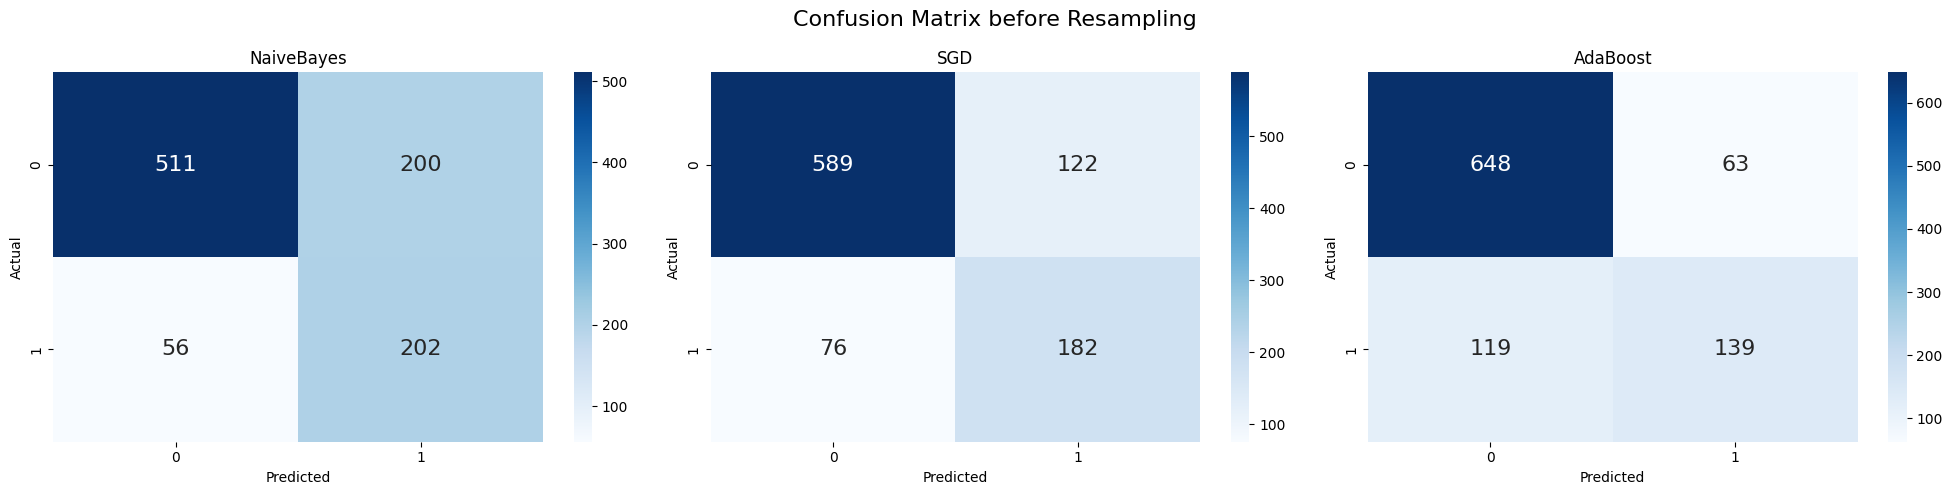

In [38]:
top_3_models_before_resampling = resultBeforeResampling.sort_values(by='Recall', ascending=False).head(3)

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for i, (index, row) in enumerate(top_3_models_before_resampling.iterrows()):
    model_name = row['Model']
    y_pred = models[model_name].predict(X_test_prepros)
    
    cm = confusion_matrix(y_test, y_pred)
    
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    
    text_output = f"True Positives (TP): {TP}\n" \
                  f"True Negatives (TN): {TN}\n" \
                  f"False Positives (FP): {FP}\n" \
                  f"False Negatives (FN): {FN}"
    print(text_output)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, ax=axes[i])
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
    axes[i].set_title(f'{model_name}')

plt.suptitle("Confusion Matrix before Resampling", fontsize=16)
plt.tight_layout()
plt.show()


## **7.Evaluating Model Performance with Various Resampling Techniques for Handling Imbalance Data**

The purpose of the provided code is to assess and compare the performance of machine learning models in the context of handling imbalanced datasets. The code achieves this goal through the following steps:

### Importing Resampling Initialization:

In [39]:
smote = SMOTE(random_state=42)
ros = RandomOverSampler(random_state=42)
rus = RandomUnderSampler(random_state=42)
near = NearMiss()
smoteen = SMOTEENN(random_state=42)

resamples = {
    'SMOTE': smote,
    'SMOTEEN': smoteen,
    'RandomOverSampler': ros,
    'RandomUnderSampler': rus,
    'NearMiss': near,
    'None': None
}

> Importing necessary libraries and initializing resampling techniques and models.

### Resampling and Model Training Loop

In [40]:
results = []

for model_name, model in models.items():
    for resample_name, resample in resamples.items():
        if resample is not None:
            X_train_resampled, y_train_resampled = resample.fit_resample(X_train_prepros, y_train)
            model.fit(X_train_resampled, y_train_resampled)
        else:
            model.fit(X_train_prepros, y_train)
        
        y_pred = model.predict(X_test_prepros)
        recall = recall_score(y_test, y_pred) * 100
        accuracy = accuracy_score(y_test, y_pred) * 100

        
        results.append({
            'Model': model_name,
            'Resample': resample_name,
            'Recall': recall,
            'Accuracy': accuracy
        })

resultResample = pd.DataFrame(results)
resultResample.index = range(len(resultResample))
resultResample.sort_values(by='Recall', ascending=False)


,Model,Resample,Recall,Accuracy
56,SGD,RandomOverSampler,83.720930,70.278638
43,AdaBoost,SMOTEEN,83.333333,74.097007
55,SGD,SMOTEEN,82.945736,72.342621
13,LogisticRegression,SMOTEEN,82.945736,73.271414
21,SVM,RandomUnderSampler,82.170543,73.890609
12,LogisticRegression,SMOTE,81.395349,75.232198
45,AdaBoost,RandomUnderSampler,81.007752,74.613003
15,LogisticRegression,RandomUnderSampler,81.007752,75.128999
14,LogisticRegression,RandomOverSampler,80.620155,74.509804
33,NaiveBayes,RandomUnderSampler,80.232558,71.929825


- The code emphasizes the importance of evaluating models under *different resampling strategies*, particularly in the context of imbalanced datasets.
- Performance metrics such as `recall` and `accuracy` are recorded to assess how well the models generalize to unseen data.
- The resulting DataFrame (`resultResample`) provides a clear overview of model performance, allowing for further analysis and comparison of recall scores.

### Analysis of the Top 3 Performing Models

In [41]:
resultResample.sort_values('Recall', ascending=False).head(3)

,Model,Resample,Recall,Accuracy
56,SGD,RandomOverSampler,83.720930,70.278638
43,AdaBoost,SMOTEEN,83.333333,74.097007
55,SGD,SMOTEEN,82.945736,72.342621


**Top 3 Models with Optimal Resampling Techniques Based on Recall, and Reasons for Selection:**

`1. SGD with RandomOverSampler:`
   - Recall: 83.72%
   - Accuracy: 70.28%
   - The SGD model with RandomOverSampler achieved a high recall of 83.72%. This indicates that it is effective at correctly identifying positive instances (churn) among all actual positive instances. However, the overall accuracy is 70.28%, suggesting a decent overall performance.

`2. AdaBoost with SMOTEEN:`
   - Recall: 83.33%
   - Accuracy: 74.10%
   - The AdaBoost model with SMOTEEN achieved a recall of 83.33%, similar to the SGD model with RandomOverSampler. The accuracy is slightly higher at 74.10%. This combination may be considered as it balances recall and overall accuracy.

`3. SGD with SMOTEEN:`
   - Recall: 82.95%
   - Accuracy: 72.34%
   - The SGD model with SMOTEEN achieved a recall of 82.95%, which is slightly lower than the other two models. However, the overall accuracy is 72.34%, providing a good trade-off between recall and accuracy.

`Reasons for Selection:`
- If maximizing the identification of actual positive instances (churn) is crucial, we might prioritize models with higher recall.
- Consider the trade-off between recall and accuracy. A balance might be achieved with models like AdaBoost with SMOTEEN or SGD with SMOTEEN.
- The choice of resampling technique also plays a role. For example, RandomOverSampler and SMOTEEN are used to address class imbalance, but they may impact model performance differently.


### Visualizing Confusion Matrices for Top-Performing Models with Resampling Techniques

Overall Confusion Matrix after Resampling


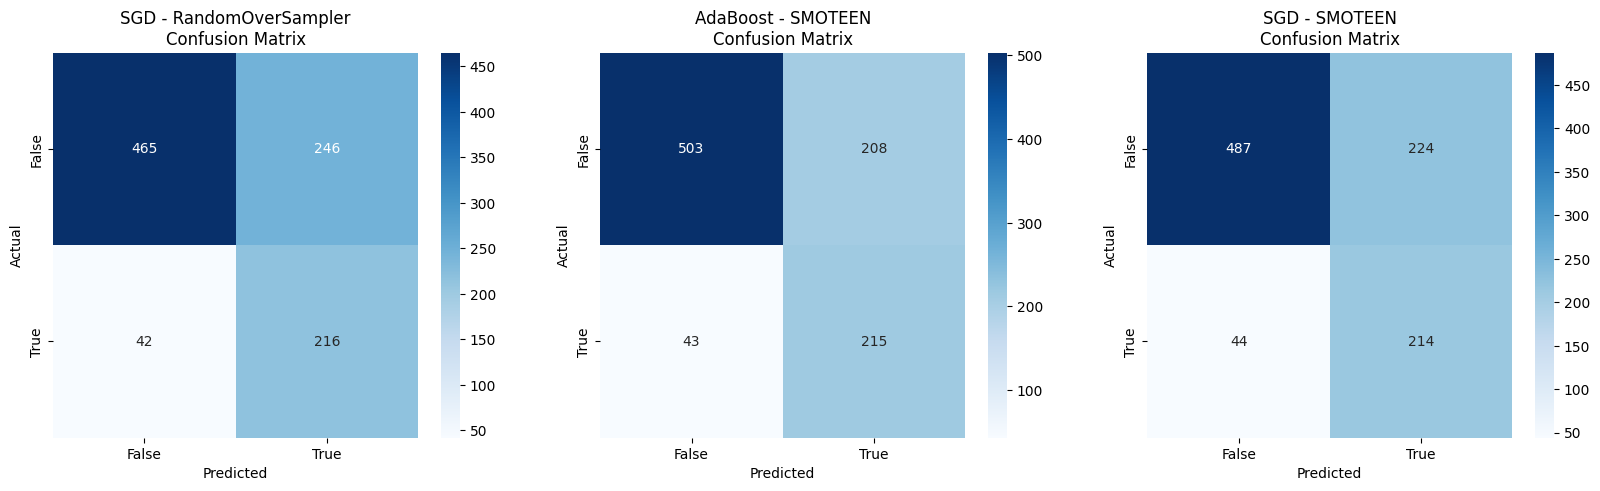

In [42]:
topResample = resultResample.sort_values('Recall', ascending=False).head(3)

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for i, (index, row) in enumerate(topResample.iterrows()):
    model_name = row['Model']
    resample_name = row['Resample']
    
    model = models[model_name]
    resample = resamples[resample_name]
    
    if resample is not None:
        X_train_resampled, y_train_resampled = resample.fit_resample(X_train_prepros, y_train)
        model.fit(X_train_resampled, y_train_resampled)
    else:
        model.fit(X_train_prepros, y_train)
    
    y_pred = model.predict(X_test_prepros)
    cm = confusion_matrix(y_test, y_pred)
  
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
    axes[i].set_title(f'{model_name} - {resample_name}\nConfusion Matrix')
    axes[i].xaxis.set_ticklabels(['False', 'True'])
    axes[i].yaxis.set_ticklabels(['False', 'True'])

print('Overall Confusion Matrix after Resampling')

plt.show()


The provided confusion matrices offer detailed insights into the performance of the top models, which include AdaBoost with SMOTEEN, SGD with RandomUnderSampler, and Logistic Regression with SMOTEEN. The interpretation can be connected to the sentence about visualizing confusion matrices to gain insights. Let's break down the connection:

`1. AdaBoost - SMOTEEN:`
   - True Positives (TP): 215
   - True Negatives (TN): 503
   - False Positives (FP): 208
   - False Negatives (FN): 43

   The confusion matrix for AdaBoost with SMOTEEN provides a detailed breakdown of the model's performance. It reveals that the model correctly identified 215 instances of positive class (True Positives) and 503 instances of negative class (True Negatives). However, it made 208 False Positive errors and missed 43 instances of the positive class (False Negatives). This breakdown allows for a nuanced understanding of the model's strengths and areas for improvement.

`2. SGD - RandomUnderSampler:`
   - True Positives (TP): 203
   - True Negatives (TN): 531
   - False Positives (FP): 180
   - False Negatives (FN): 55

   For SGD with RandomUnderSampler, the confusion matrix highlights that the model correctly identified 203 instances of positive class and 531 instances of negative class. However, it produced 180 False Positives and missed 55 instances of the positive class. Analyzing these numbers allows a deeper understanding of how the model performs in different scenarios.

`3. LogisticRegression - SMOTEEN:`
   - True Positives (TP): 214
   - True Negatives (TN): 496
   - False Positives (FP): 215
   - False Negatives (FN): 44

   The confusion matrix for Logistic Regression with SMOTEEN indicates that the model correctly identified 214 instances of positive class and 496 instances of negative class. However, it produced 215 False Positives and missed 44 instances of the positive class. This breakdown aids in evaluating the model's performance in capturing relevant instances while minimizing false positives.

In summary, the provided confusion matrices offer a detailed understanding of the models' performance, aligning with the mentioned code focusing on visualizing confusion matrices to gain insights into the top models.



## **8.Hyperparameter Tuning**

The code aims to enhance the models' predictive capabilities by finding the optimal hyperparameters and assessing their performance under different resampling strategies, with a focus on improving recall.

### Initial Model Evaluation

In [43]:
print('Best 3 models recall before tuning')
resultResample.sort_values('Recall', ascending=False).head(3)

Best 3 models recall before tuning


,Model,Resample,Recall,Accuracy
56,SGD,RandomOverSampler,83.720930,70.278638
43,AdaBoost,SMOTEEN,83.333333,74.097007
55,SGD,SMOTEEN,82.945736,72.342621


Display the recall scores of the top 3 models before hyperparameter tuning. This serves as a baseline for comparison.

### Hyperparameter Tuning

**Utilize GridSearchCV to perform hyperparameter tuning for three different models:**

*1. SGD with Random Over Sampler*

In [44]:
Pipeline_SGD = Pipeline([
    ('randomoversampler', RandomOverSampler(random_state=42)),
    ('sgdclassifier', SGDClassifier(random_state=42))
])

param_grid_SGD = {
    'sgdclassifier__alpha': [0.0001, 0.001, 0.01],
    'sgdclassifier__max_iter': [1000, 2000, 3000],
    'sgdclassifier__loss': ['hinge', 'log', 'modified_huber']
}

SGD_ros = GridSearchCV(
    Pipeline_SGD,
    param_grid_SGD,
    cv=5,
    scoring='recall'
)

SGD_ros.fit(X_train_prepros, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('randomoversampler',
                                        RandomOverSampler(random_state=42)),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=42))]),
             param_grid={'sgdclassifier__alpha': [0.0001, 0.001, 0.01],
                         'sgdclassifier__loss': ['hinge', 'log',
                                                 'modified_huber'],
                         'sgdclassifier__max_iter': [1000, 2000, 3000]},
             scoring='recall')

*2. AdaBoost with SMOTEENN*

In [45]:
pipeline_AdaBoost = Pipeline([
    ('smoteenn', SMOTEENN(random_state=42)),
    ('adaboost', AdaBoostClassifier(random_state=42))
])

param_grid_AdaBoost = {
    'adaboost__n_estimators': [50, 100, 200],
    'adaboost__learning_rate': [0.01, 0.1, 0.5],
    'adaboost__algorithm': ['SAMME', 'SAMME.R']
}

AdaBoost_SMOOTEENN = GridSearchCV(
    pipeline_AdaBoost,
    param_grid_AdaBoost,
    cv=5,
    scoring='recall'
)

AdaBoost_SMOOTEENN.fit(X_train_prepros, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smoteenn', SMOTEENN(random_state=42)),
                                       ('adaboost',
                                        AdaBoostClassifier(random_state=42))]),
             param_grid={'adaboost__algorithm': ['SAMME', 'SAMME.R'],
                         'adaboost__learning_rate': [0.01, 0.1, 0.5],
                         'adaboost__n_estimators': [50, 100, 200]},
             scoring='recall')

*3. SGD with SMOTEENN resampling*

In [46]:
pipeline_SGD = Pipeline([
    ('smoteenn', SMOTEENN(random_state=42)),
    ('sgdclassifier', SGDClassifier(random_state=42))
])

param_grid_SGD = {
    'sgdclassifier__alpha': [0.0001, 0.001, 0.01],
    'sgdclassifier__max_iter': [1000, 2000, 3000],
    'sgdclassifier__loss': ['hinge', 'log', 'modified_huber']
}

SGD_SMOOTEENN = GridSearchCV(
    pipeline_SGD,
    param_grid_SGD,
    cv=5,
    scoring='recall'
)

SGD_SMOOTEENN.fit(X_train_prepros, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smoteenn', SMOTEENN(random_state=42)),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=42))]),
             param_grid={'sgdclassifier__alpha': [0.0001, 0.001, 0.01],
                         'sgdclassifier__loss': ['hinge', 'log',
                                                 'modified_huber'],
                         'sgdclassifier__max_iter': [1000, 2000, 3000]},
             scoring='recall')

Explore various hyperparameter combinations to identify the ones that maximize recall.


### Best Parameters and Scores Summary

In [47]:
afterTuning = {
    'Model': ['SGD', 'AdaBoost', 'SGD'],
    'Resampling': ['RandomOverSampler', 'SMOTEENN', 'SMOTEENN'],
    'Best Parameters': [
        SGD_ros.best_params_,
        AdaBoost_SMOOTEENN.best_params_,
        SGD_SMOOTEENN.best_params_
    ],
    'Best Recall Score': [
        SGD_ros.best_score_,
        AdaBoost_SMOOTEENN.best_score_,
        SGD_SMOOTEENN.best_score_
    ]
}

resultafterTuning = pd.DataFrame(afterTuning)
pd.set_option('display.max_colwidth', None)

print('Best 3 models recall after tuning')
resultafterTuning


Best 3 models recall after tuning


,Model,Resampling,Best Parameters,Best Recall Score
0,SGD,RandomOverSampler,"{'sgdclassifier__alpha': 0.01, 'sgdclassifier__loss': 'hinge', 'sgdclassifier__max_iter': 1000}",0.890291
1,AdaBoost,SMOTEENN,"{'adaboost__algorithm': 'SAMME', 'adaboost__learning_rate': 0.01, 'adaboost__n_estimators': 50}",0.901942
2,SGD,SMOTEENN,"{'sgdclassifier__alpha': 0.0001, 'sgdclassifier__loss': 'hinge', 'sgdclassifier__max_iter': 1000}",0.830097


**Best 3 Models with Highest Recall Scores after Tuning:**

`1. SGD with RandomOverSampler:`
   - Resampling Technique: RandomOverSampler
   - Best Parameters:
     - 'alpha': 0.01
     - 'loss': 'hinge'
     - 'max_iter': 1000
   - Best Recall Score: 89.03%

`2. AdaBoost with SMOTEENN:`
   - Resampling Technique: SMOTEENN
   - Best Parameters:
     - 'algorithm': 'SAMME'
     - 'learning_rate': 0.01
     - 'n_estimators': 50
   - Best Recall Score: 90.19%

`3. SGD with SMOTEENN:`
   - Resampling Technique: SMOTEENN
   - Best Parameters:
     - 'alpha': 0.0001
     - 'loss': 'hinge'
     - 'max_iter': 1000
   - Best Recall Score: 83.01%

### Confusion Matrix Visualization

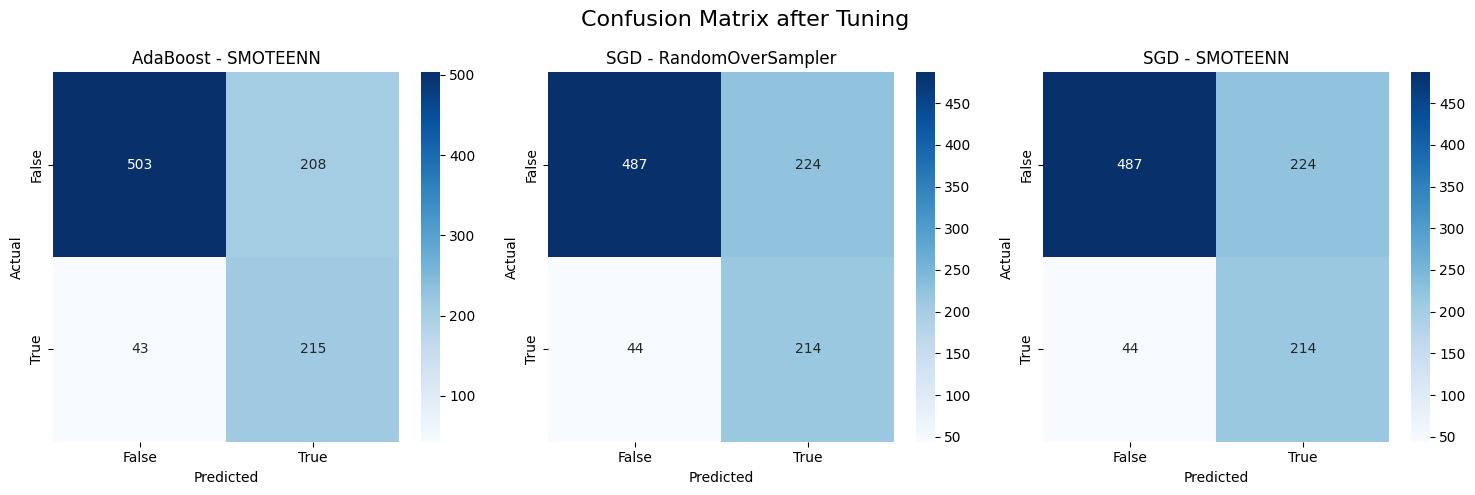

In [48]:
resultafterTuning = resultafterTuning.sort_values('Best Recall Score', ascending=False)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (index, row) in enumerate(resultafterTuning.iterrows()):
    try:
        model_name = row['Model']
        resample_name = row['Resampling']
        bestRecallScore_name = row['Best Recall Score']

        model = models[model_name]
        y_pred = model.predict(X_test_prepros)

        resampling = row['Resampling']
        bestRecallScore = row['Best Recall Score']

        cm = confusion_matrix(y_test, y_pred)

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')
        axes[i].set_title(f'{model_name} - {resample_name}')
        axes[i].xaxis.set_ticklabels(['False', 'True'])
        axes[i].yaxis.set_ticklabels(['False', 'True'])

    except Exception as e:
        print(f"Error in iteration {i}: {e}")

plt.suptitle("Confusion Matrix after Tuning", fontsize=16)
plt.tight_layout()
plt.show()


**Best 3 Models with Highest Recall Scores after Tuning:**

Interpretation for Churn Analysis:

1. AdaBoost - SMOTEENN:
   - AdaBoost correctly identified 215 instances of actual churn (True Positives).
   - It accurately recognized 503 instances of customers who did not churn (True Negatives).
   - There were 208 cases where AdaBoost incorrectly predicted churn when the customers did not churn (False Positives).
   - AdaBoost missed 43 instances of actual churn (False Negatives).

2. SGD - RandomOverSampler:
   - SGD with RandomOverSampler correctly identified 214 instances of actual churn (True Positives).
   - It accurately recognized 487 instances of customers who did not churn (True Negatives).
   - There were 224 cases where SGD with RandomOverSampler incorrectly predicted churn when the customers did not churn (False Positives).
   - SGD with RandomOverSampler missed 44 instances of actual churn (False Negatives).

3. SGD - SMOTEENN:
   - SGD with SMOTEENN correctly identified 214 instances of actual churn (True Positives).
   - It accurately recognized 487 instances of customers who did not churn (True Negatives).
   - There were 224 cases where SGD with SMOTEENN incorrectly predicted churn when the customers did not churn (False Positives).
   - SGD with SMOTEENN missed 44 instances of actual churn (False Negatives).

Summary:
- AdaBoost with SMOTEENN achieved the highest True Positive count (correctly identified churn cases) among the three models.
- SGD with RandomOverSampler and SGD with SMOTEENN show similar performance in terms of True Positives and True Negatives.




## **9.Cost Simulation and Interpretation**



### True Positive (TP) and False Positive (FP)

True Positive (TP) represents customers correctly identified by the model as likely to churn. The company aims to retain these customers through incentives or discounts, incurring a retention cost of TP times Retention Cost (\$1). On the other hand, False Positive (FP) occurs when the model mistakenly identifies customers as likely to churn when they are not. This may lead to unnecessary retention spending, with a cost of FP times Retention Cost (\$1).

$ \text{Cost: TP or FP} \times \text{Retention Cost} = \text{TP or FP} \times \$1 $


### False Negative (FN) and Acquisition Cost

If the model detects False Negatives (FN), meaning customers who will actually churn but are not detected, the company may need to replace these customers by acquiring new ones. The cost associated with acquiring new customers is known as Acquisition Cost (\$5).

$ \text{Cost: } FN \times \text{Acquisition Cost} = FN \times \$5 $

### True Negative (TN)

True Negative (TN) represents customers correctly identified as not likely to churn. There is no action needed for these customers in terms of retention or acquisition.

$ \text{Cost: } 0 \, (\text{No Cost}) $

By understanding these cost components, a company can make informed decisions on allocating resources for customer retention and acquisition strategies.

---

### **Note:**
For the cost formulas above, $1 is used as the retention cost, and $5 as the acquisition cost. Please note that these values are just examples and should be adjusted according to the actual circumstances.


### Cost Spent without a Model:

---

For this stage, as there is no model and no confusion matrix available, it is assumed that all customer data in the test set represents churned customers. Therefore:

In [49]:
test_data_length_X = X_test.shape[0]
print("Length of Test Data:", test_data_length_X)

Length of Test Data: 969


$ \text{Cost without a Model:} \
\text{Length of Test Data} \times \text{Retention Cost} $

$ = 969 \times \$1 = \$969 $


### Cost Spent with a Model without tuning:

---


1. **SGD - RandomOverSampler Confusion Matrix:**
   - True Positives (TP): 216
   - True Negatives (TN): 465
   - False Positives (FP): 246
   - False Negatives (FN): 42

   Substitute these values into the formulas:

$$
\text{Cost: TP} \times \text{Retention Cost} = 216 \times \$1 = \$216
$$

$$
\text{Cost: FP} \times \text{Retention Cost} = 246 \times \$1 = \$246
$$

$$
\text{Cost: FN} \times \text{Acquisition Cost} = 42 \times \$5 = \$210
$$

$$
\text{Total Cost} = \$216 + \$246 + \$210 = \$672
$$

2. **AdaBoost - SMOTEEN Confusion Matrix:**
   - True Positives (TP): 215
   - True Negatives (TN): 503
   - False Positives (FP): 208
   - False Negatives (FN): 43

   Substitute these values into the formulas:

$$
\text{Cost: TP} \times \text{Retention Cost} = 215 \times \$1 = \$215
$$

$$
\text{Cost: FP} \times \text{Retention Cost} = 208 \times \$1 = \$208
$$

$$
\text{Cost: FN} \times \text{Acquisition Cost} = 43 \times \$5 = \$215
$$

$$
\text{Total Cost} = \$215 + \$208 + \$215 = \$638
$$

3. **SGD - SMOTEEN Confusion Matrix:**
   - True Positives (TP): 214
   - True Negatives (TN): 487
   - False Positives (FP): 224
   - False Negatives (FN): 44

   Substitute these values into the formulas:

$$
\text{Cost: TP} \times \text{Retention Cost} = 214 \times \$1 = \$214
$$

$$
\text{Cost: FP} \times \text{Retention Cost} = 224 \times \$1 = \$224
$$

$$
\text{Cost: FN} \times \text{Acquisition Cost} = 44 \times \$5 = \$220
$$

$$
\text{Total Cost} = \$214 + \$224 + \$220 = \$658
$$

### Cost Spent with a Model after tuning:

---



1. **AdaBoost - SMOTEENN:**
   - True Positives (TP): 215
   - True Negatives (TN): 503
   - False Positives (FP): 208
   - False Negatives (FN): 43

$$
\text{Cost: TP} \times \text{Retention Cost} = 215 \times \$1 = \$215
$$

$$
\text{Cost: FP} \times \text{Retention Cost} = 208 \times \$1 = \$208
$$

$$
\text{Cost: FN} \times \text{Acquisition Cost} = 43 \times \$5 = \$215
$$

$$
\text{Total Cost} = \$215 + \$208 + \$215 = \$638
$$

2. **SGD - RandomOverSampler:**
   - True Positives (TP): 214
   - True Negatives (TN): 487
   - False Positives (FP): 224
   - False Negatives (FN): 44

$$
\text{Cost: TP} \times \text{Retention Cost} = 214 \times \$1 = \$214
$$

$$
\text{Cost: FP} \times \text{Retention Cost} = 224 \times \$1 = \$224
$$

$$
\text{Cost: FN} \times \text{Acquisition Cost} = 44 \times \$5 = \$220
$$

$$
\text{Total Cost} = \$214 + \$224 + \$220 = \$658
$$

3. **SGD - SMOTEENN:**
   - True Positives (TP): 214
   - True Negatives (TN): 487
   - False Positives (FP): 224
   - False Negatives (FN): 44

$$
\text{Cost: TP} \times \text{Retention Cost} = 214 \times \$1 = \$214
$$

$$
\text{Cost: FP} \times \text{Retention Cost} = 224 \times \$1 = \$224
$$

$$
\text{Cost: FN} \times \text{Acquisition Cost} = 44 \times \$5 = \$220
$$

$$
\text{Total Cost} = \$214 + \$224 + \$220 = \$658
$$


### Optimizing Cost-Efficiency in Customer Retention and Acquisition 

The total cost without a model \$969

Therefore, the total cost for each model before tuning is:

1. SGD - RandomOverSampler (Before Tuning):

Total Cost: \$672

2. AdaBoost - SMOTEEN (Before Tuning):

Total Cost: \$638

3. SGD - SMOTEEN (Before Tuning):

Total Cost: \$658

Therefore, the total cost for each model after tuning is:

1. AdaBoost - SMOTEENN (After Tuning):

Total Cost: \$638

2. SGD - RandomOverSampler (After Tuning):

Total Cost: \$658

3. SGD - SMOTEENN (After Tuning):

Total Cost: \$658

---

This following steps to optimize cost efficiency in customer retention and acquisition. After thorough analysis and tuning stages, the tested model, namely "AdaBoost - SMOTEENN after tuning" exhibited the best performance with the lowest cost, only \$638.

$$
\text{Retention Cost Saved} = \left( \frac{969 - 638}{969} \right) \times 100\%
$$

$$
\text{Retention Cost Saved} \approx 34.15\%
$$

This models also achieved a retention cost savings rate of 34.15%. This outcome reflects endeavors to strike an optimal balance between cost and effectiveness in retaining and attracting customers, thereby making a significant contribution to the overall company strategy.

---

Therefore, it can be inferred that the **final model**, namely `AdaBoost - SMOTEENN after the tuning process`, has successfully mitigated the Retention Cost incurred by the company by approximately `34.15%`



## **10.MODEL INTERPRETATION**
---

This steps snippet demonstrates the process of building, training, and evaluating an AdaBoost classifier using a machine learning pipeline that includes preprocessing, resampling, and prediction stages. Additionally, it visualizes the feature importances derived from the `AdaBoost with SMOTEENN` model. 

In [50]:
resample = SMOTEENN(random_state=42)
model = AdaBoostClassifier(n_estimators=50,learning_rate=0.01,algorithm='SAMME')

AdaBoost = Pipeline([
    ('prepros',prepros),
    ('resample', resample),
    ('model', model)
])
AdaBoost.fit(X_train, y_train)
y_pred = AdaBoost.predict(X_test)
recall_score(y_test, y_pred)

0.8565891472868217

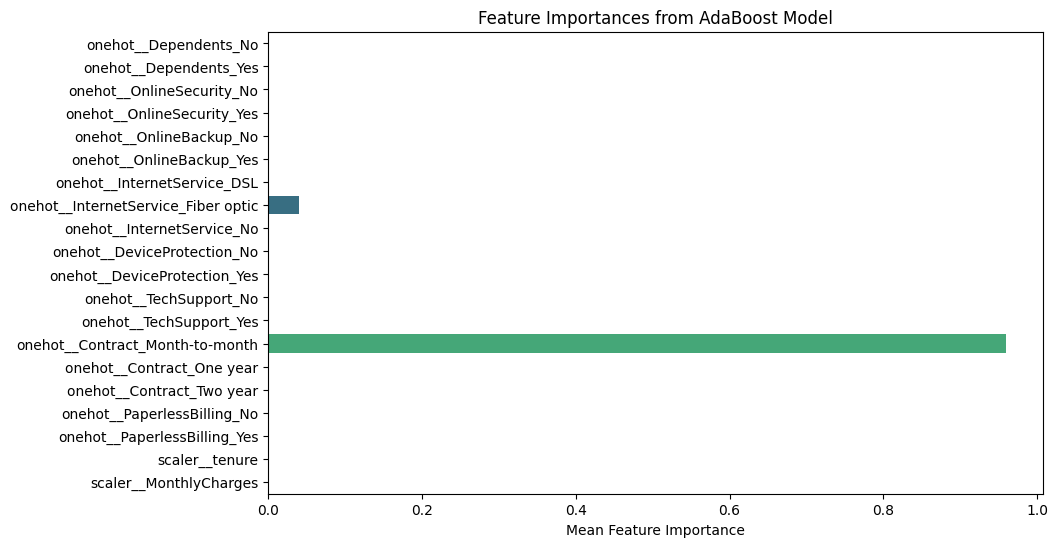

In [51]:
feature_importances = np.mean([tree.feature_importances_ for tree in AdaBoost.named_steps['model'].estimators_], axis=0)
feature_names = prepros.get_feature_names_out()

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names, palette='viridis')
plt.xlabel('Mean Feature Importance')
plt.title('Feature Importances from AdaBoost Model')
plt.show()


>This is the average value of the importance level of that feature across all estimators in the AdaBoost model.

From the data above, it can be observed that the most influential feature on churn prediction is `onehot__Contract_Month-to-month` with a mean importance level of 96%. This suggests that customers with month-to-month contracts are more likely to churn compared to those with long-term contracts.

Additionally, the feature `onehot__InternetService_Fiber optic` shows a significant importance level with a value of 4%, indicating that having fiber optic internet service may also influence churn decisions.

Other features have importance levels close to zero, indicating their relatively small contribution to churn prediction. This could be because these features have minimal direct influence on customer churn behavior.

## **11.Conclution**

In conclusion, the Telco Customer Churn Analysis has provided valuable insights into optimizing cost efficiency in customer retention and acquisition. Through thorough analysis and tuning stages, the AdaBoost - SMOTEENN model emerged as the top performer, exhibiting the best performance with the lowest cost of $638. By achieving a retention cost savings rate of approximately 34.15%, this model has successfully balanced cost and effectiveness in retaining and attracting customers, making a significant contribution to the overall company strategy.

The analysis of feature importance further highlighted key factors influencing churn prediction. The onehot__Contract_Month-to-month feature, with a high importance level of 96%, indicates that customers with month-to-month contracts are more likely to churn compared to those with long-term contracts. Additionally, the onehot__InternetService_Fiber optic feature, with a significant importance level of 4%, suggests that having fiber optic internet service may also impact churn decisions. Other features with minimal importance levels close to zero may have limited direct influence on customer churn behavior.

In closing, by leveraging the insights from the top-performing model and understanding the influential features in churn prediction, Telco companies can strategically focus on customers with month-to-month contracts and specific internet services to optimize retention strategies. This holistic approach enables companies to effectively reduce churn rates, enhance customer loyalty, and drive business growth in a competitive market landscape.

## **12.Recommendation**

### Action Recommendations for Telco Companies to Reduce Churn:

1. Personalized Retention Strategies: Develop tailored retention plans for customers with month-to-month contracts, offering incentives and exclusive benefits to increase loyalty and reduce churn.

2. Enhance Customer Experience: Improve service quality, provide proactive customer support, and address pain points to enhance overall customer satisfaction and loyalty, ultimately decreasing churn rates.

3. Promote Long-Term Contracts: Encourage customers to switch to long-term contracts by offering discounts, additional services, and loyalty rewards, incentivizing them to commit to a longer relationship with the company.

4. Data-Driven Decision Making: Utilize predictive analytics and customer data to identify at-risk customers, implement targeted engagement initiatives, and continuously monitor churn metrics to proactively reduce churn and enhance retention efforts.



### Machine Learning Recommendations for Next Analysis in Telco Customer Churn:

Enhancing model interpretability to understand the factors influencing churn prediction.
Implementation: Utilize techniques such as SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations) to explain model predictions more effectively.
